In [13]:
import pandas as pd
gf = pd.read_csv('E:\\DB103RichardC\\python\\190826PyETL\\dataHUB\\googleFlight\\depart\\2019-09-19cleaned\\dep2019-09-20.csv')
gf.dtypes

dep_airline      object
dep_etd          object
dep_duration     object
dep_eta          object
dep_price       float64
score             int64
dtype: object

In [14]:
import datetime
gf['dep_etd']=pd.to_datetime(gf['dep_etd'])
gf.dtypes

dep_airline             object
dep_etd         datetime64[ns]
dep_duration            object
dep_eta                 object
dep_price              float64
score                    int64
dtype: object

In [15]:
gf['dep_duration']=pd.to_timedelta(gf['dep_duration'])
gf.dtypes

dep_airline              object
dep_etd          datetime64[ns]
dep_duration    timedelta64[ns]
dep_eta                  object
dep_price               float64
score                     int64
dtype: object

In [17]:
gf['dep_etd1']=pd.to_numeric(gf['dep_etd'])
gf['dep_dur1']=pd.to_numeric(gf['dep_duration'])
gf = gf.drop(columns=['dep_airline', 'dep_etd','dep_eta','dep_duration'])
gf

,dep_price,score,dep_etd1,dep_dur1
0,6425.0,0,1568961300000000000,12300000000000
1,6729.0,0,1568980800000000000,12300000000000
2,6964.0,37,1568961600000000000,12300000000000
3,6725.0,0,1568989500000000000,12300000000000
4,7217.0,0,1568944200000000000,12300000000000
5,7705.0,0,1568988000000000000,12300000000000
6,8364.0,37,1568991600000000000,12600000000000
7,8438.0,67,1568983200000000000,11700000000000
8,8729.0,67,1568989800000000000,12300000000000
9,8853.0,97,1568984400000000000,12000000000000


In [19]:
from sklearn import preprocessing
# Get column names first
names = gf.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_gf = scaler.fit_transform(gf)
scaled_gf = pd.DataFrame(scaled_gf, columns=names)
scaled_gf

,dep_price,score,dep_etd1,dep_dur1
0,-1.123943,-1.691741,-1.274764,0.743527
1,-1.052545,-1.691741,0.009116,0.743527
2,-0.997352,-0.686519,-1.255012,0.743527
3,-1.053484,-1.691741,0.581924,0.743527
4,-0.937931,-1.691741,-2.400628,0.743527
5,-0.823317,-1.691741,0.483164,0.743527
6,-0.668541,-0.686519,0.720188,1.252257
7,-0.651161,0.128526,0.167132,-0.273931
8,-0.582816,0.128526,0.601676,0.743527
9,-0.553693,0.943572,0.246140,0.234798


In [20]:
from sklearn.cluster import KMeans
cluster = KMeans()

In [21]:
cluster.fit(scaled_gf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
scaled_gf = pd.DataFrame(scaled_gf, columns=['dep_price','score','dep_etd1','dep_dur1'])
scaled_gf["label"] = cluster.labels_
scaled_gf

,dep_price,score,dep_etd1,dep_dur1,label
0,-1.123943,-1.691741,-1.274764,0.743527,1
1,-1.052545,-1.691741,0.009116,0.743527,5
2,-0.997352,-0.686519,-1.255012,0.743527,1
3,-1.053484,-1.691741,0.581924,0.743527,5
4,-0.937931,-1.691741,-2.400628,0.743527,1
5,-0.823317,-1.691741,0.483164,0.743527,5
6,-0.668541,-0.686519,0.720188,1.252257,5
7,-0.651161,0.128526,0.167132,-0.273931,3
8,-0.582816,0.128526,0.601676,0.743527,3
9,-0.553693,0.943572,0.246140,0.234798,3


In [23]:
cluster.cluster_centers_

array([[ 0.15383616,  0.75339438, -0.78754784,  0.4891628 ],
       [-1.01974196, -1.35666719, -1.643468  ,  0.74352746],
       [ 3.70956532,  0.97073978,  1.13498052, -1.29138979],
       [-0.30982525,  0.49529672,  0.5095004 ,  0.23479814],
       [ 1.1776491 ,  0.59038534,  0.99013249, -1.96969554],
       [-0.89947183, -1.44043573,  0.44859839,  0.87070978],
       [ 0.16945464,  0.44096037, -0.68220382, -1.29138979],
       [ 0.01162579, -1.28421872,  2.0633247 , -0.27393117]])

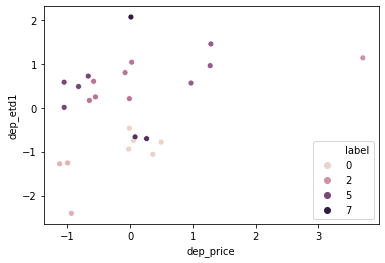

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.scatterplot(x=scaled_gf["dep_price"],
                y=scaled_gf["dep_etd1"],
                hue=scaled_gf["label"])

In [27]:
from sklearn.metrics import silhouette_score
x = []
y = []
for k in range(2, 10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(scaled_gf)
    s = silhouette_score(scaled_gf, cluster.labels_)
    x.append(k)
    y.append(s)
print("K choice:", x)
print("Score:", y)

K choice: [2, 3, 4, 5, 6, 7, 8, 9]
Score: [0.43403301395930743, 0.4250002728760215, 0.43869713997063753, 0.5079853574386934, 0.5727038848468367, 0.5850071158087154, 0.6020979080048184, 0.5035245389919271]


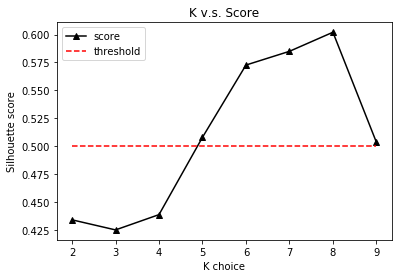

In [28]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
threshold = [0.5] * len(x)
plt.title("K v.s. Score")
plt.xlabel("K choice")
plt.ylabel("Silhouette score")
p1, = plt.plot(x, y, "^-k", label="score")
p2, = plt.plot(x, threshold, "--r", label="threshold")
plt.legend(handles=[p1, p2])